In [1]:
num_of_lamps = 6
search_space_qubits = 3
helper_qubits = num_of_lamps
number_of_iterations = 1

# Circle 0 to 5, 
# a+1, a-1, a+n/2

{'101': 2709, '001': 2796, '000': 341, '011': 2867, '110': 309, '111': 321, '010': 336, '100': 321}
33


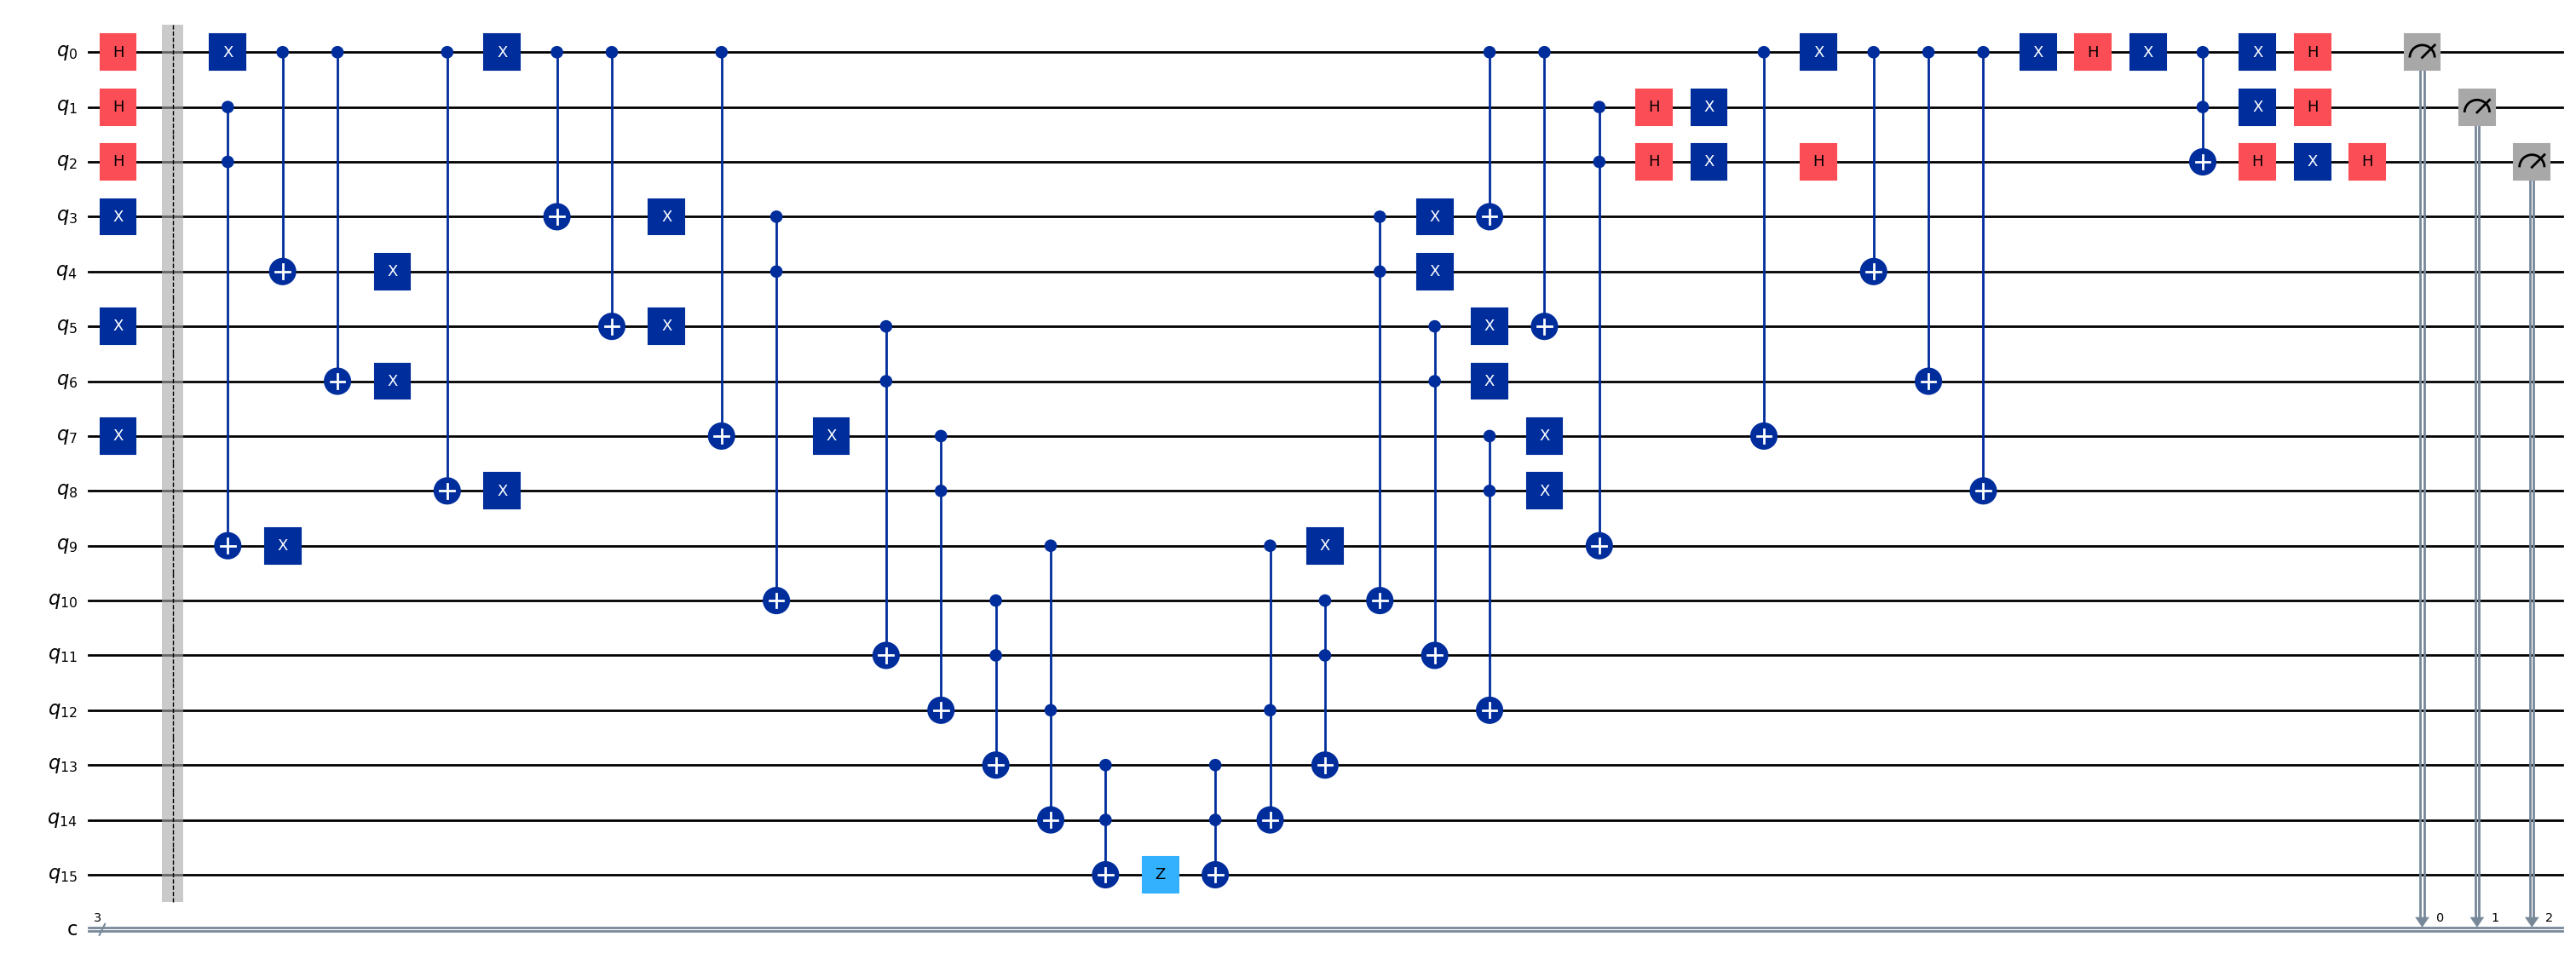

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

oracle = QuantumCircuit(search_space_qubits + 1 + num_of_lamps + helper_qubits)

oracle.x(0)
oracle.cx(0,search_space_qubits+1)
oracle.cx(0,search_space_qubits+3)
oracle.cx(0,search_space_qubits+5)
oracle.x(0)

oracle.cx(0,search_space_qubits)
oracle.cx(0,search_space_qubits+2)
oracle.cx(0,search_space_qubits+4)

oracle.ccx(1,2,search_space_qubits+6)

for i in range(num_of_lamps+1):
    oracle.x(search_space_qubits + i)

oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+4, search_space_qubits+5, search_space_qubits + num_of_lamps + 3)
oracle.ccx(search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2, search_space_qubits + num_of_lamps + 4)
oracle.ccx(search_space_qubits + num_of_lamps + 3, search_space_qubits+6, search_space_qubits + num_of_lamps + 5)
oracle.ccx(search_space_qubits + num_of_lamps + 5, search_space_qubits + num_of_lamps + 4, search_space_qubits + num_of_lamps + 6)
oracle.z(search_space_qubits + num_of_lamps + 6)
oracle.ccx(search_space_qubits + num_of_lamps + 5, search_space_qubits + num_of_lamps + 4, search_space_qubits + num_of_lamps + 6)
oracle.ccx(search_space_qubits + num_of_lamps + 3, search_space_qubits+6, search_space_qubits + num_of_lamps + 5)
oracle.ccx(search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2, search_space_qubits + num_of_lamps + 4)
oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+4, search_space_qubits+5, search_space_qubits + num_of_lamps + 3)

for i in range(num_of_lamps+1):
    oracle.x(search_space_qubits + i)

oracle.ccx(1,2,search_space_qubits+6)

oracle.cx(0,search_space_qubits)
oracle.cx(0,search_space_qubits+2)
oracle.cx(0,search_space_qubits+4)

oracle.x(0)
oracle.cx(0,search_space_qubits+1)
oracle.cx(0,search_space_qubits+3)
oracle.cx(0,search_space_qubits+5)
oracle.x(0)

grover = QuantumCircuit(search_space_qubits + 1 + num_of_lamps + helper_qubits, search_space_qubits)

#Input
grover.x(search_space_qubits)
grover.x(search_space_qubits+4)
grover.x(search_space_qubits+2)

for i in range(search_space_qubits):
    grover.h(i)
grover.barrier()

for i in range(number_of_iterations):
    grover = grover.compose(oracle)
    
    for j in range(search_space_qubits):
        grover.h(j)
    for j in range(search_space_qubits):
        grover.x(j)
    grover.h(2)
    grover.ccx(0,1,2)
    grover.h(2)
    for j in range(search_space_qubits):
        grover.x(j)
    for j in range(search_space_qubits):
        grover.h(j)

grover.measure(range(search_space_qubits),range(search_space_qubits))

job = AerSimulator().run(grover,shots=10000)
counts = job.result().get_counts(grover)
print(counts)

print(grover.depth())
grover.draw(output='mpl', fold=50)

In [3]:
from qiskit.qasm2 import dumps
qasm_str = dumps(grover)
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[16];
creg c[3];
x q[3];
x q[7];
x q[5];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15];
x q[0];
cx q[0],q[4];
cx q[0],q[6];
cx q[0],q[8];
x q[0];
cx q[0],q[3];
cx q[0],q[5];
cx q[0],q[7];
ccx q[1],q[2],q[9];
x q[3];
x q[4];
x q[5];
x q[6];
x q[7];
x q[8];
x q[9];
ccx q[3],q[4],q[10];
ccx q[5],q[6],q[11];
ccx q[7],q[8],q[12];
ccx q[10],q[11],q[13];
ccx q[12],q[9],q[14];
ccx q[14],q[13],q[15];
z q[15];
ccx q[14],q[13],q[15];
ccx q[12],q[9],q[14];
ccx q[10],q[11],q[13];
ccx q[3],q[4],q[10];
ccx q[5],q[6],q[11];
ccx q[7],q[8],q[12];
x q[3];
x q[4];
x q[5];
x q[6];
x q[7];
x q[8];
x q[9];
ccx q[1],q[2],q[9];
cx q[0],q[3];
cx q[0],q[5];
cx q[0],q[7];
x q[0];
cx q[0],q[4];
cx q[0],q[6];
cx q[0],q[8];
x q[0];
h q[0];
h q[1];
h q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
h q[2];
x q[0];
x q[1];
x q[2];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];

Statistics

In [4]:
from collections import Counter
from qiskit.converters import circuit_to_dag

def circuit_report(qc, twoq_names=("ecr","cx","cz","swap")):
    ops = qc.count_ops()
    n_2q_by_name = sum(ops.get(g, 0) for g in twoq_names)
    n_2q_by_arity = sum(1 for inst, qargs, cargs in qc.data if inst.num_qubits == 2)
    
    dag = circuit_to_dag(qc)
    n_active = qc.num_qubits - len(list(dag.idle_wires()))

    return {
        "num_qubits": qc.num_qubits,
        "num_of_used_qubits": n_active,
        "depth": qc.depth(),
        "size": qc.size(),
        "ops_by_name": dict(ops),
        "two_qubit_ops_by_name": n_2q_by_name,
        "two_qubit_ops_by_arity": n_2q_by_arity,
        "swap_count": ops.get("swap", 0),
        "measure_count": ops.get("measure", 0),
        "reset_count": ops.get("reset", 0),
        "delay_count": ops.get("delay", 0),
    }


<h3>ibm_marrakesh</h3>

In [5]:
import qiskit.qasm3

qasm = """
OPENQASM 3.0;
include "stdgates.inc";
gate rzz(p0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(p0) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
bit[3] c;
rz(pi/2) $11;
sx $11;
rz(pi/2) $11;
x $13;
x $14;
rz(pi/2) $19;
sx $19;
rz(pi/2) $19;
x $31;
rz(pi/2) $35;
sx $35;
rz(pi/2) $35;
barrier $11, $19, $35, $13, $10, $31, $18, $14, $12, $34, $9, $30, $15, $8, $33, $32;
rx(-pi/2) $8;
rz(-pi/2) $8;
rz(pi/2) $9;
sx $9;
rz(pi/2) $9;
rz(pi/2) $10;
sx $10;
rz(pi/2) $10;
x $11;
cz $11, $10;
rz(pi/2) $10;
sx $10;
rz(pi/2) $10;
rzz(pi/4) $10, $9;
rz(pi/4) $9;
rx(pi) $9;
rz(pi/4) $10;
rx(pi/2) $10;
rz(-pi/2) $10;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
sx $13;
sx $14;
rz(pi/2) $15;
sx $15;
rz(pi/2) $15;
rz(pi/2) $18;
sx $18;
rz(pi/2) $18;
cz $11, $18;
cz $11, $12;
x $11;
rx(-pi/2) $12;
rz(-pi/2) $12;
cz $13, $12;
sx $12;
sx $13;
cz $13, $12;
sx $12;
sx $13;
cz $13, $12;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
cz $11, $12;
rx(pi/2) $12;
rz(pi/2) $12;
sx $13;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
rz(pi/2) $13;
sx $13;
rz(pi/2) $13;
rzz(pi/4) $14, $15;
rz(pi/4) $14;
rx(pi/2) $14;
rz(-pi/2) $14;
rz(pi/4) $15;
rx(pi) $15;
rx(-pi/2) $18;
rz(-pi/2) $18;
rz(pi/2) $30;
sx $30;
rz(pi/2) $30;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
rz(pi/2) $18;
sx $18;
rz(pi/2) $18;
cz $11, $18;
sx $11;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
cz $11, $10;
rz(pi/2) $10;
rx(-pi/2) $10;
rzz(pi/4) $10, $9;
rz(pi/4) $9;
rx(-pi/2) $9;
rz(pi/4) $10;
rx(pi/2) $10;
rz(-pi/2) $10;
cz $11, $10;
rx(pi/2) $10;
rz(pi/2) $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
sx $9;
x $11;
rzz(pi/4) $11, $10;
rz(-3*pi/4) $10;
rx(pi/2) $10;
rz(pi/2) $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
rz(-pi/4) $11;
rx(-pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
cz $12, $13;
rz(-pi/2) $13;
rx(pi/2) $13;
rz(pi/2) $13;
cz $13, $14;
rz(pi/2) $14;
rx(-pi/2) $14;
rzz(pi/4) $14, $15;
rz(pi/4) $14;
rx(pi/2) $14;
rz(-pi/2) $14;
cz $13, $14;
rx(-pi/2) $13;
rx(pi/2) $14;
rz(pi/2) $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
rz(pi/4) $15;
rx(pi) $15;
rzz(pi/4) $14, $15;
rz(-pi/4) $14;
rx(-pi/2) $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
rz(-3*pi/4) $15;
rx(pi/2) $15;
rz(pi/2) $15;
rz(-pi/2) $18;
rx(pi/2) $18;
rz(pi/2) $18;
rzz(pi/4) $31, $30;
rz(pi/4) $30;
rx(pi) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
cz $18, $31;
rz(pi/2) $31;
rx(-pi/2) $31;
rzz(pi/4) $31, $30;
rz(pi/4) $30;
rx(-pi/2) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
cz $18, $31;
x $18;
rx(pi/2) $31;
rz(pi/2) $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
rzz(pi/4) $18, $31;
rz(-pi/4) $18;
rx(-pi/2) $18;
rz(pi/4) $31;
rx(pi/2) $31;
rz(pi/2) $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
rzz(pi/4) $18, $11;
rz(pi/4) $11;
rx(-pi/2) $11;
rz(-pi/4) $18;
rx(pi/2) $18;
rz(-pi/2) $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
cz $10, $11;
rz(pi/2) $11;
rx(-pi/2) $11;
rzz(pi/4) $11, $18;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $10, $11;
rx(-pi/2) $10;
rx(pi/2) $11;
rz(pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
rz(pi/4) $18;
rx(pi) $18;
rzz(pi/4) $11, $18;
rz(-pi/4) $11;
rx(-pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
rz(pi/4) $18;
rx(pi/2) $18;
rz(pi/2) $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
rz(pi/2) $32;
sx $32;
rz(pi/2) $32;
rzz(pi/4) $31, $32;
rz(-pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
rz(pi/4) $32;
rx(-pi/2) $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
rz(pi/2) $33;
sx $33;
rz(pi/2) $33;
rz(pi/2) $34;
sx $34;
rz(pi/2) $34;
x $35;
rzz(pi/4) $35, $34;
rz(pi/4) $34;
rx(pi) $34;
rz(pi/4) $35;
rx(pi/2) $35;
rz(-pi/2) $35;
cz $19, $35;
rz(pi/2) $35;
rx(-pi/2) $35;
rzz(pi/4) $35, $34;
rz(pi/4) $34;
rx(pi) $34;
rz(pi/4) $35;
rx(pi/2) $35;
rz(-pi/2) $35;
cz $19, $35;
rx(-pi/2) $19;
rx(pi/2) $35;
rz(pi/2) $35;
cz $35, $19;
sx $19;
sx $35;
cz $35, $19;
sx $19;
sx $35;
cz $35, $19;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
rzz(pi/4) $35, $34;
rz(3*pi/4) $34;
rx(pi/2) $34;
rz(pi/2) $34;
rzz(pi/4) $34, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $34;
rx(pi/2) $34;
rz(-pi/2) $34;
rz(-pi/4) $35;
rx(-pi/2) $35;
cz $35, $19;
sx $19;
sx $35;
cz $35, $19;
sx $19;
sx $35;
cz $35, $19;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
cz $35, $34;
rz(pi/2) $34;
rx(-pi/2) $34;
rzz(pi/4) $34, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $34;
rx(pi/2) $34;
rz(-pi/2) $34;
cz $35, $34;
rx(pi/2) $34;
rz(pi/2) $34;
rx(-pi/2) $35;
cz $34, $35;
sx $34;
sx $35;
cz $34, $35;
sx $34;
sx $35;
cz $34, $35;
rzz(pi/4) $34, $33;
rz(3*pi/4) $33;
rx(pi/2) $33;
rz(pi/2) $33;
cz $33, $32;
rz(pi/2) $32;
rx(-pi/2) $32;
rzz(pi/4) $32, $31;
rz(pi/4) $31;
rx(-pi/2) $31;
rz(pi/4) $32;
rx(pi/2) $32;
rz(-pi/2) $32;
cz $33, $32;
rx(pi/2) $32;
rz(pi/2) $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
x $33;
rzz(pi/4) $33, $32;
rz(pi/4) $32;
rx(pi) $32;
rzz(pi/4) $31, $32;
rz(-pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
rz(pi/4) $32;
rx(-pi/2) $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
rz(-pi/4) $33;
x $33;
cz $33, $32;
rz(pi/2) $32;
rx(-pi/2) $32;
rzz(pi/4) $32, $31;
rz(pi/4) $31;
rx(-pi/2) $31;
rz(pi/4) $32;
rx(pi/2) $32;
rz(-pi/2) $32;
cz $33, $32;
rx(pi/2) $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
rzz(pi/4) $11, $18;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $10, $11;
rz(pi/2) $11;
rx(-pi/2) $11;
rz(pi/4) $18;
rx(pi) $18;
rzz(pi/4) $11, $18;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $10, $11;
x $10;
rx(pi/2) $11;
rz(pi/4) $18;
rx(-pi/2) $18;
cz $18, $11;
sx $11;
sx $18;
cz $18, $11;
sx $11;
sx $18;
cz $18, $11;
rzz(pi/4) $10, $11;
rz(-pi/4) $10;
rx(pi/2) $10;
rz(-pi/2) $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
rzz(pi/4) $8, $9;
rz(-pi/4) $8;
rx(pi/2) $8;
rz(-pi/2) $8;
rz(pi/4) $9;
rx(-pi/2) $9;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
cz $10, $9;
rz(pi/2) $9;
rx(-pi/2) $9;
rzz(pi/4) $9, $8;
rz(pi/4) $8;
rx(pi) $8;
rz(pi/4) $9;
rx(pi/2) $9;
rz(-pi/2) $9;
cz $10, $9;
rx(pi/2) $9;
rz(pi/2) $9;
rx(-pi/2) $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
rzz(pi/4) $9, $8;
rz(3*pi/4) $8;
rx(pi/2) $8;
rz(pi/2) $8;
rz(-pi/4) $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
rz(-3*pi/4) $11;
rx(pi/2) $11;
rz(pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $10;
rz(pi/2) $11;
sx $11;
rz(pi/2) $11;
cz $12, $11;
rx(-pi/2) $11;
rz(-pi/2) $11;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
rzz(pi/4) $30, $31;
rz(-pi/4) $30;
rx(pi/2) $30;
rz(-pi/2) $30;
rz(pi/4) $31;
rx(-pi/2) $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
cz $18, $31;
rz(pi/2) $31;
rx(-pi/2) $31;
rzz(pi/4) $31, $30;
rz(pi/4) $30;
rx(pi) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
cz $18, $31;
rx(-pi/2) $18;
rx(pi/2) $31;
rz(pi/2) $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
rzz(pi/4) $31, $30;
rz(3*pi/4) $30;
rx(pi/2) $30;
rz(pi/2) $30;
rz(-pi/4) $31;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
rz(pi/2) $11;
sx $11;
rz(pi/2) $11;
cz $12, $11;
rx(-pi/2) $11;
rz(-pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $11;
sx $12;
sx $18;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
sx $31;
cz $18, $31;
sx $18;
x $33;
rzz(pi/4) $33, $32;
rz(3*pi/4) $32;
rx(pi/2) $32;
rz(pi/2) $32;
rz(pi/4) $33;
rx(pi/2) $33;
rz(-pi/2) $33;
rz(-pi/4) $34;
rx(-pi/2) $34;
sx $35;
cz $34, $35;
sx $34;
sx $35;
cz $34, $35;
sx $34;
sx $35;
cz $34, $35;
rzz(pi/4) $34, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $34;
rx(pi/2) $34;
rz(-pi/2) $34;
cz $35, $34;
rz(pi/2) $34;
rx(-pi/2) $34;
rzz(pi/4) $34, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $34;
rx(pi/2) $34;
rz(-pi/2) $34;
cz $35, $34;
rx(-pi/2) $34;
rz(-pi) $34;
rx(-pi/2) $35;
cz $35, $34;
sx $34;
sx $35;
cz $35, $34;
sx $34;
sx $35;
cz $35, $34;
rzz(pi/4) $19, $35;
rz(pi/4) $19;
rx(pi/2) $19;
rz(-pi/2) $19;
cz $15, $19;
rz(pi/2) $19;
rx(-pi/2) $19;
rzz(pi/4) $34, $33;
rz(3*pi/4) $33;
rx(pi/2) $33;
rz(pi/2) $33;
rz(-pi/4) $34;
rx(pi/2) $34;
rz(-pi/2) $34;
rz(pi/4) $35;
rx(pi) $35;
rzz(pi/4) $19, $35;
rz(pi/4) $19;
rx(pi/2) $19;
rz(-pi/2) $19;
cz $15, $19;
rx(-pi/2) $15;
rx(-pi/2) $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
rz(pi/4) $35;
rx(pi) $35;
rzz(pi/4) $19, $35;
rz(pi/4) $19;
rx(pi/2) $19;
rz(-pi/2) $19;
rzz(pi/4) $19, $15;
rz(pi/4) $15;
rx(-pi/2) $15;
rz(-pi/4) $19;
rx(pi/2) $19;
rz(-pi/2) $19;
rz(-3*pi/4) $35;
rx(pi/2) $35;
rz(pi/2) $35;
cz $35, $34;
sx $34;
sx $35;
cz $35, $34;
sx $34;
sx $35;
cz $35, $34;
sx $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
sx $19;
cz $15, $19;
sx $15;
sx $19;
cz $15, $19;
sx $15;
sx $19;
cz $15, $19;
rzz(pi/4) $14, $15;
rz(pi/4) $14;
rx(pi/2) $14;
rz(-pi/2) $14;
cz $13, $14;
rz(pi/2) $14;
rx(-pi/2) $14;
rz(pi/4) $15;
rx(pi) $15;
rzz(pi/4) $14, $15;
rz(pi/4) $14;
rx(pi/2) $14;
rz(-pi/2) $14;
cz $13, $14;
rx(-pi/2) $13;
rx(pi/2) $14;
rz(pi/2) $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
cz $13, $12;
sx $12;
sx $13;
cz $13, $12;
sx $12;
sx $13;
cz $13, $12;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
cz $11, $18;
sx $11;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
rz(pi/4) $15;
rx(pi) $15;
rzz(pi/4) $14, $15;
rz(pi/4) $14;
rx(pi/2) $14;
rz(pi/2) $14;
cz $13, $14;
x $13;
cz $13, $12;
rx(-pi/2) $12;
rz(-pi/2) $12;
rx(-pi/2) $14;
rz(-pi/2) $14;
rz(-3*pi/4) $15;
rx(pi/2) $15;
rz(pi/2) $15;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
sx $11;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
cz $13, $12;
rx(-pi/2) $12;
rz(-pi/2) $12;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
sx $11;
sx $18;
cz $11, $18;
sx $11;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
cz $13, $12;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
rx(-pi/2) $13;
rz(pi/2) $13;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $13;
sx $14;
cz $14, $13;
sx $14;
cz $15, $14;
sx $14;
sx $15;
cz $15, $14;
sx $14;
sx $15;
cz $15, $14;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
sx $15;
sx $19;
cz $19, $15;
cz $19, $35;
sx $19;
rz(pi/2) $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
rzz(pi/4) $19, $15;
rz(pi/4) $15;
rx(pi) $15;
rz(pi/4) $19;
rx(pi/2) $19;
rz(-pi/2) $19;
cz $35, $19;
rx(-pi/2) $19;
rz(-pi) $19;
rx(-pi/2) $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
sx $19;
sx $35;
cz $19, $35;
rzz(pi/4) $19, $15;
rz(3*pi/4) $15;
rx(pi/2) $15;
rz(-pi/2) $15;
rz(pi/4) $19;
rx(pi/2) $19;
rz(pi/2) $19;
c[0] = measure $19;
c[1] = measure $35;
c[2] = measure $15;

"""
circuit = qiskit.qasm3.loads(qasm)

In [6]:
print(circuit_report(circuit))

{'num_qubits': 36, 'num_of_used_qubits': 16, 'depth': 313, 'size': 951, 'ops_by_name': {'sx': 308, 'rz': 225, 'cz': 219, 'rx': 138, 'rzz': 45, 'x': 13, 'measure': 3, 'barrier': 1}, 'two_qubit_ops_by_name': 219, 'two_qubit_ops_by_arity': 264, 'swap_count': 0, 'measure_count': 3, 'reset_count': 0, 'delay_count': 0}


C:\Users\user\AppData\Local\Temp\ipykernel_2972\1539513954.py:7: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  n_2q_by_arity = sum(1 for inst, qargs, cargs in qc.data if inst.num_qubits == 2)


<h3>ibm_fez</h3>

In [7]:
import qiskit.qasm3

qasm = """
OPENQASM 3.0;
include "stdgates.inc";
gate rzz(p0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(p0) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
bit[3] c;
x $1;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
x $5;
sx $17;
x $23;
rz(pi/2) $25;
sx $25;
rz(pi/2) $25;
rz(pi/2) $37;
sx $37;
rz(pi/2) $37;
barrier $3, $37, $25, $1, $2, $5, $4, $23, $16, $26, $0, $6, $24, $7, $28, $27;
rz(pi/2) $0;
sx $0;
rz(pi/2) $0;
sx $1;
rz(pi/2) $2;
sx $2;
rz(pi/2) $2;
x $3;
cz $3, $2;
rx(-pi/2) $2;
rz(-pi/2) $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
rzz(pi/4) $1, $0;
rz(pi/4) $0;
rx(pi) $0;
rz(pi/4) $1;
rx(pi/2) $1;
rz(-pi/2) $1;
rz(pi/2) $2;
sx $2;
rz(pi/2) $2;
rz(pi/2) $4;
sx $4;
rz(pi/2) $4;
cz $3, $4;
rx(-pi/2) $4;
rz(-pi/2) $4;
sx $5;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
rz(pi/2) $4;
sx $4;
rz(pi/2) $4;
rz(pi/2) $6;
sx $6;
rz(pi/2) $6;
rzz(pi/4) $5, $6;
rz(pi/4) $5;
rx(pi/2) $5;
rz(-pi/2) $5;
rz(pi/4) $6;
rx(pi) $6;
rz(pi/2) $7;
sx $7;
rz(pi/2) $7;
rz(pi/2) $16;
sx $16;
rz(pi/2) $16;
cz $3, $16;
x $3;
cz $3, $2;
rz(-pi/2) $2;
rx(pi/2) $2;
rz(pi/2) $2;
cz $2, $1;
rz(pi/2) $1;
rx(-pi/2) $1;
rzz(pi/4) $1, $0;
rz(pi/4) $0;
rx(-pi/2) $0;
rz(pi/4) $1;
rx(pi/2) $1;
rz(-pi/2) $1;
cz $2, $1;
rx(pi/2) $1;
rz(pi/2) $1;
cz $1, $0;
sx $0;
sx $1;
cz $1, $0;
sx $0;
sx $1;
cz $1, $0;
x $2;
rzz(pi/4) $2, $1;
rz(-3*pi/4) $1;
rx(pi/2) $1;
rz(pi/2) $1;
rz(-pi/4) $2;
rx(-pi/2) $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
sx $2;
cz $3, $4;
rz(-pi/2) $4;
rx(pi/2) $4;
rz(pi/2) $4;
cz $4, $5;
rz(pi/2) $5;
rx(-pi/2) $5;
rzz(pi/4) $5, $6;
rz(pi/4) $5;
rx(pi/2) $5;
rz(-pi/2) $5;
cz $4, $5;
rx(-pi/2) $4;
rx(pi/2) $5;
rz(pi/2) $5;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
sx $4;
rz(pi/4) $6;
rx(pi) $6;
rzz(pi/4) $5, $6;
rz(-pi/4) $5;
rx(-pi/2) $5;
rz(-pi/4) $6;
rx(pi/2) $6;
rz(pi/2) $6;
rzz(pi/4) $6, $7;
rz(pi/4) $6;
rx(pi/2) $6;
rz(-pi/2) $6;
rz(pi/4) $7;
rx(pi) $7;
rx(-pi/2) $16;
rz(-pi/2) $16;
sx $23;
cz $16, $23;
sx $16;
sx $23;
cz $16, $23;
sx $16;
sx $23;
cz $16, $23;
rz(pi/2) $16;
sx $16;
rz(pi/2) $16;
cz $3, $16;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $4, $3;
sx $3;
sx $4;
cz $4, $3;
sx $3;
sx $4;
cz $4, $3;
sx $3;
sx $4;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
sx $4;
sx $5;
cz $5, $4;
sx $4;
cz $4, $3;
sx $3;
sx $4;
cz $4, $3;
sx $3;
sx $4;
cz $4, $3;
cz $5, $6;
rz(pi/2) $6;
rx(-pi/2) $6;
rzz(pi/4) $6, $7;
rz(pi/4) $6;
rx(pi/2) $6;
rz(-pi/2) $6;
cz $5, $6;
rx(-pi/2) $5;
rx(pi/2) $6;
rz(pi/2) $6;
cz $6, $5;
sx $5;
sx $6;
cz $6, $5;
sx $5;
sx $6;
cz $6, $5;
sx $5;
rz(pi/4) $7;
rx(pi) $7;
rzz(pi/4) $6, $7;
rz(-pi/4) $6;
rx(-pi/2) $6;
cz $6, $5;
sx $5;
sx $6;
cz $6, $5;
sx $5;
sx $6;
cz $6, $5;
rz(pi/4) $7;
rx(pi/2) $7;
rz(pi/2) $7;
rz(-pi/2) $16;
rx(pi/2) $16;
rz(pi/2) $16;
cz $17, $7;
sx $7;
sx $17;
cz $17, $7;
sx $7;
sx $17;
cz $17, $7;
sx $7;
rz(pi/2) $24;
sx $24;
rz(pi/2) $24;
rzz(pi/4) $23, $24;
rz(pi/4) $23;
rx(pi/2) $23;
rz(-pi/2) $23;
cz $16, $23;
rz(pi/2) $23;
rx(-pi/2) $23;
rz(pi/4) $24;
rx(pi) $24;
rzz(pi/4) $23, $24;
rz(pi/4) $23;
rx(pi/2) $23;
rz(-pi/2) $23;
cz $16, $23;
rx(-pi/2) $16;
rx(pi/2) $23;
rz(pi/2) $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
rz(pi/4) $24;
rx(pi) $24;
rzz(pi/4) $23, $24;
rz(-pi/4) $23;
rx(-pi/2) $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
rz(-3*pi/4) $24;
rx(pi/2) $24;
rz(pi/2) $24;
x $25;
rz(pi/2) $26;
sx $26;
rz(pi/2) $26;
rzz(pi/4) $25, $26;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
rz(pi/4) $26;
rx(pi) $26;
rx(-pi/2) $27;
rz(-pi/2) $27;
rx(-pi/2) $28;
rz(-pi/2) $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $28;
cz $37, $25;
rz(pi/2) $25;
rx(-pi/2) $25;
rzz(pi/4) $25, $26;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
rz(pi/4) $26;
rx(pi) $26;
cz $37, $25;
rx(pi/2) $25;
rz(pi/2) $25;
rx(-pi/2) $37;
cz $25, $37;
sx $25;
sx $37;
cz $25, $37;
sx $25;
sx $37;
cz $25, $37;
rzz(pi/4) $25, $26;
rz(-pi/4) $25;
rx(-pi/2) $25;
cz $25, $24;
sx $24;
sx $25;
cz $25, $24;
sx $24;
sx $25;
cz $25, $24;
rz(3*pi/4) $26;
rx(pi/2) $26;
rz(pi/2) $26;
rzz(pi/4) $26, $27;
rz(pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
cz $25, $26;
rz(pi/2) $26;
rx(-pi/2) $26;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $26, $27;
rz(pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
cz $25, $26;
rx(-pi/2) $25;
rx(pi/2) $26;
rz(pi/2) $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
sx $25;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $26, $27;
rz(-pi/4) $26;
rx(-pi/2) $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
rz(-3*pi/4) $27;
rx(pi/2) $27;
rz(pi/2) $27;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
rz(pi/4) $27;
rx(-pi/2) $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
cz $27, $17;
rz(pi/2) $17;
rx(-pi/2) $17;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
rz(pi/4) $27;
rx(-pi/2) $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
cz $27, $17;
rz(-pi/2) $17;
rx(pi/2) $17;
rz(pi/2) $17;
x $27;
rzz(pi/4) $27, $28;
rz(-pi/4) $27;
rx(-pi/2) $27;
rz(pi/4) $28;
rx(-pi/2) $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
rz(pi/4) $27;
rx(-pi/2) $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
cz $27, $17;
rz(pi/2) $17;
rx(-pi/2) $17;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
rz(pi/4) $27;
rx(-pi/2) $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
cz $27, $17;
rx(pi/2) $17;
cz $7, $17;
sx $7;
sx $17;
cz $7, $17;
sx $7;
sx $17;
cz $7, $17;
rzz(pi/4) $6, $7;
rz(pi/4) $6;
rx(pi/2) $6;
rz(-pi/2) $6;
cz $5, $6;
rz(pi/2) $6;
rx(-pi/2) $6;
rz(pi/4) $7;
rx(pi) $7;
rzz(pi/4) $6, $7;
rz(pi/4) $6;
rx(pi/2) $6;
rz(-pi/2) $6;
cz $5, $6;
rx(-pi/2) $5;
rx(pi/2) $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
rzz(pi/4) $4, $5;
rz(pi/4) $4;
rx(pi/2) $4;
rz(-pi/2) $4;
cz $3, $4;
rz(pi/2) $4;
rx(-pi/2) $4;
rz(pi/4) $5;
rx(pi) $5;
rzz(pi/4) $4, $5;
rz(pi/4) $4;
rx(pi/2) $4;
rz(-pi/2) $4;
cz $3, $4;
x $3;
rx(pi/2) $4;
rz(pi/2) $4;
rz(pi/4) $5;
rx(-pi/2) $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
rzz(pi/4) $3, $4;
rz(-pi/4) $3;
sx $3;
rz(-3*pi/4) $4;
rx(pi/2) $4;
rz(pi/2) $4;
sx $5;
rz(pi/4) $7;
rx(pi) $7;
rzz(pi/4) $6, $7;
rz(-pi/4) $6;
rx(pi/2) $6;
rz(-pi/2) $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
sx $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
sx $4;
cz $3, $4;
sx $3;
sx $4;
cz $3, $4;
sx $3;
sx $4;
cz $3, $4;
sx $3;
cz $2, $3;
sx $2;
sx $3;
cz $2, $3;
sx $2;
sx $3;
cz $2, $3;
sx $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
rzz(pi/4) $0, $1;
rz(-pi/4) $0;
rx(pi/2) $0;
rz(-pi/2) $0;
rz(pi/4) $1;
rx(-pi/2) $1;
cz $1, $0;
sx $0;
sx $1;
cz $1, $0;
sx $0;
sx $1;
cz $1, $0;
cz $2, $1;
rz(pi/2) $1;
rx(-pi/2) $1;
rzz(pi/4) $1, $0;
rz(pi/4) $0;
rx(pi) $0;
rz(pi/4) $1;
rx(pi/2) $1;
rz(-pi/2) $1;
cz $2, $1;
rx(pi/2) $1;
rz(pi/2) $1;
rx(-pi/2) $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
sx $1;
sx $2;
cz $1, $2;
rzz(pi/4) $1, $0;
rz(3*pi/4) $0;
rx(pi/2) $0;
rz(pi/2) $0;
rz(-pi/4) $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
rz(pi/2) $2;
sx $2;
rz(pi/2) $2;
cz $3, $2;
rx(-pi/2) $2;
rz(-pi/2) $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $1;
sx $2;
cz $2, $1;
sx $2;
rz(pi/2) $4;
sx $4;
rz(pi/2) $4;
cz $3, $4;
sx $3;
rx(-pi/2) $4;
rz(-pi/2) $4;
sx $5;
sx $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
sx $5;
sx $6;
cz $5, $6;
sx $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
sx $4;
sx $5;
cz $4, $5;
sx $4;
rz(3*pi/4) $7;
rx(pi/2) $7;
rz(pi/2) $7;
x $27;
rzz(pi/4) $27, $28;
rz(pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
rzz(pi/4) $26, $27;
rz(pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
cz $25, $26;
rz(pi/2) $26;
rx(-pi/2) $26;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $26, $27;
rz(pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
cz $25, $26;
rx(-pi/2) $25;
rx(-pi/2) $26;
rz(-pi) $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
sx $25;
sx $26;
cz $26, $25;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $26, $27;
rz(-pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
rz(3*pi/4) $27;
rx(pi/2) $27;
rz(pi/2) $27;
rz(3*pi/4) $28;
rx(pi/2) $28;
rz(pi/2) $28;
rzz(pi/4) $37, $25;
rz(pi/4) $25;
rx(-pi/2) $25;
rz(-pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $25, $37;
sx $25;
sx $37;
cz $25, $37;
sx $25;
sx $37;
cz $25, $37;
cz $24, $25;
rz(pi/2) $25;
rx(-pi/2) $25;
rzz(pi/4) $25, $37;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
cz $24, $25;
rx(-pi/2) $24;
rx(-pi/2) $25;
cz $25, $26;
sx $25;
sx $26;
cz $25, $26;
sx $25;
sx $26;
cz $25, $26;
sx $25;
cz $24, $25;
sx $24;
sx $25;
cz $24, $25;
sx $24;
sx $25;
cz $24, $25;
rzz(pi/4) $23, $24;
rz(pi/4) $23;
rx(pi/2) $23;
rz(-pi/2) $23;
cz $16, $23;
rz(pi/2) $23;
rx(-pi/2) $23;
rz(pi/4) $24;
rx(pi) $24;
rzz(pi/4) $23, $24;
rz(pi/4) $23;
rx(pi/2) $23;
rz(-pi/2) $23;
cz $16, $23;
rx(-pi/2) $16;
rx(pi/2) $23;
rz(pi/2) $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
cz $16, $3;
sx $3;
sx $16;
cz $16, $3;
sx $3;
sx $16;
cz $16, $3;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
sx $2;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
rz(pi/4) $24;
rx(pi) $24;
rzz(pi/4) $23, $24;
rz(pi/4) $23;
rx(pi/2) $23;
rz(pi/2) $23;
cz $16, $23;
x $16;
cz $16, $3;
rx(-pi/2) $3;
rz(-pi/2) $3;
cz $3, $4;
sx $3;
sx $4;
cz $3, $4;
sx $3;
sx $4;
cz $3, $4;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
cz $16, $3;
rx(-pi/2) $3;
rz(-pi/2) $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
sx $2;
sx $3;
cz $3, $2;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
cz $16, $3;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
rx(-pi/2) $16;
rz(pi/2) $16;
rx(-pi/2) $23;
rz(-pi/2) $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $16;
sx $23;
cz $23, $16;
sx $23;
rz(-3*pi/4) $24;
rx(pi/2) $24;
rz(pi/2) $24;
cz $24, $23;
sx $23;
sx $24;
cz $24, $23;
sx $23;
sx $24;
cz $24, $23;
rz(pi/4) $37;
rx(pi) $37;
rzz(pi/4) $25, $37;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
rzz(pi/4) $25, $26;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
cz $24, $25;
rz(pi/2) $25;
rx(-pi/2) $25;
rz(pi/4) $26;
rx(pi) $26;
rzz(pi/4) $25, $26;
rz(pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
cz $24, $25;
x $24;
rx(-pi/2) $25;
rz(-pi) $25;
rz(pi/4) $26;
rx(-pi/2) $26;
cz $25, $26;
sx $25;
sx $26;
cz $25, $26;
sx $25;
sx $26;
cz $25, $26;
rzz(pi/4) $24, $25;
rz(pi/4) $24;
rx(pi/2) $24;
rz(pi/2) $24;
rz(3*pi/4) $25;
rx(pi/2) $25;
rz(-pi/2) $25;
rz(3*pi/4) $37;
rx(pi/2) $37;
rz(pi/2) $37;
c[0] = measure $24;
c[1] = measure $26;
c[2] = measure $25;

"""
circuit = qiskit.qasm3.loads(qasm)

In [8]:
print(circuit_report(circuit))

{'num_qubits': 38, 'num_of_used_qubits': 17, 'depth': 325, 'size': 913, 'ops_by_name': {'sx': 282, 'rz': 225, 'cz': 204, 'rx': 142, 'rzz': 45, 'x': 12, 'measure': 3, 'barrier': 1}, 'two_qubit_ops_by_name': 204, 'two_qubit_ops_by_arity': 249, 'swap_count': 0, 'measure_count': 3, 'reset_count': 0, 'delay_count': 0}


C:\Users\user\AppData\Local\Temp\ipykernel_2972\1539513954.py:7: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  n_2q_by_arity = sum(1 for inst, qargs, cargs in qc.data if inst.num_qubits == 2)


<h3>ibm_torino</h3>

In [9]:
import qiskit.qasm3

qasm = """
OPENQASM 3.0;
include "stdgates.inc";
gate rzz(p0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(p0) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
bit[3] c;
sx $8;
sx $9;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
x $18;
x $29;
x $32;
rz(pi/2) $37;
sx $37;
rz(pi/2) $37;
rz(pi/2) $52;
sx $52;
rz(pi/2) $52;
barrier $12, $52, $37, $18, $11, $29, $31, $32, $30, $33, $10, $27, $28, $17, $36, $26;
rz(pi/2) $10;
sx $10;
rz(pi/2) $10;
rz(pi/2) $11;
sx $11;
rz(pi/2) $11;
x $12;
cz $12, $11;
rz(pi/2) $11;
sx $11;
rz(pi/2) $11;
rzz(pi/4) $11, $10;
rz(pi/4) $10;
rx(pi) $10;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
sx $12;
rz(pi/2) $17;
sx $17;
rz(pi/2) $17;
sx $18;
cz $18, $12;
sx $12;
sx $18;
cz $18, $12;
sx $12;
sx $18;
cz $18, $12;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
rz(pi/2) $26;
sx $26;
rz(pi/2) $26;
rz(pi/2) $27;
sx $27;
rz(pi/2) $27;
rx(-pi/2) $28;
rz(-pi/2) $28;
sx $29;
sx $30;
rz(pi/2) $31;
sx $31;
rz(pi/2) $31;
cz $18, $31;
rx(-pi/2) $31;
rz(-pi/2) $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
sx $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
rzz(pi/4) $28, $27;
rz(pi/4) $27;
rx(pi) $27;
rz(pi/4) $28;
rx(pi/2) $28;
rz(-pi/2) $28;
sx $30;
rz(pi/2) $31;
sx $31;
rz(pi/2) $31;
cz $18, $31;
x $18;
cz $18, $12;
rz(-pi/2) $12;
rx(pi/2) $12;
rz(pi/2) $12;
cz $12, $11;
rz(pi/2) $11;
rx(-pi/2) $11;
rzz(pi/4) $11, $10;
rz(pi/4) $10;
rx(pi) $10;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $12, $11;
rx(pi/2) $11;
rz(pi/2) $11;
rx(-pi/2) $12;
cz $11, $12;
sx $11;
sx $12;
cz $11, $12;
sx $11;
sx $12;
cz $11, $12;
rzz(pi/4) $11, $10;
rz(-3*pi/4) $10;
rx(pi/2) $10;
rz(pi/2) $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
sx $9;
sx $10;
cz $9, $10;
sx $9;
cz $8, $9;
sx $8;
sx $9;
cz $8, $9;
sx $8;
sx $9;
cz $8, $9;
sx $9;
sx $10;
rz(-pi/4) $11;
rx(-pi/2) $11;
sx $12;
cz $11, $12;
sx $11;
sx $12;
cz $11, $12;
sx $11;
sx $12;
cz $11, $12;
rx(-pi/2) $31;
rz(-pi/2) $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
rzz(pi/4) $30, $29;
rz(pi/4) $29;
rx(-pi/2) $29;
rz(-pi/4) $30;
rx(pi/2) $30;
rz(-pi/2) $30;
rz(pi/2) $31;
sx $31;
rz(pi/2) $31;
cz $18, $31;
rx(pi/2) $31;
rz(pi/2) $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
cz $29, $28;
rz(pi/2) $28;
rx(-pi/2) $28;
rzz(pi/4) $28, $27;
rz(pi/4) $27;
rx(pi) $27;
rz(pi/4) $28;
rx(pi/2) $28;
rz(-pi/2) $28;
cz $29, $28;
rx(pi/2) $28;
rz(pi/2) $28;
rx(-pi/2) $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
rzz(pi/4) $28, $27;
rz(-pi/4) $27;
rx(pi/2) $27;
rz(pi/2) $27;
rzz(pi/4) $27, $17;
rz(pi/4) $17;
rx(-pi/2) $17;
rz(-pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
cz $17, $27;
sx $17;
sx $27;
cz $17, $27;
sx $17;
sx $27;
cz $17, $27;
cz $8, $17;
rz(pi/2) $17;
rx(-pi/2) $17;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
cz $8, $17;
rx(-pi/2) $8;
rx(pi/2) $17;
rz(pi/2) $17;
cz $17, $8;
sx $8;
sx $17;
cz $17, $8;
sx $8;
sx $17;
cz $17, $8;
sx $8;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $17, $27;
rz(-pi/4) $17;
rx(-pi/2) $17;
cz $17, $8;
sx $8;
sx $17;
cz $17, $8;
sx $8;
sx $17;
cz $17, $8;
rz(-pi/4) $27;
rx(pi/2) $27;
rz(pi/2) $27;
rzz(pi/4) $27, $26;
rz(pi/4) $26;
rx(pi) $26;
rz(pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
rz(-pi/4) $28;
rx(-pi/2) $28;
sx $29;
sx $30;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
rz(pi/2) $31;
sx $31;
rz(pi/2) $31;
cz $18, $31;
rz(-pi/2) $31;
rx(pi/2) $31;
rz(pi/2) $31;
cz $31, $32;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
rz(pi/2) $32;
rx(-pi/2) $32;
rzz(pi/4) $32, $31;
rz(pi/4) $31;
rx(-pi/2) $31;
rz(-pi/4) $32;
rx(pi/2) $32;
rz(-pi/2) $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
cz $30, $31;
rx(-pi/2) $30;
rx(pi/2) $31;
rz(pi/2) $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
rzz(pi/4) $31, $32;
rz(-pi/4) $31;
rx(-pi/2) $31;
rz(-3*pi/4) $32;
rx(pi/2) $32;
rz(pi/2) $32;
rz(pi/2) $33;
sx $33;
rz(pi/2) $33;
rx(-pi/2) $36;
rz(-pi/2) $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
sx $36;
x $37;
rzz(pi/4) $37, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $52, $37;
rz(pi/2) $37;
rx(-pi/2) $37;
rzz(pi/4) $37, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $52, $37;
rx(pi/2) $37;
rz(pi/2) $37;
rx(-pi/2) $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
rzz(pi/4) $37, $33;
rz(-3*pi/4) $33;
rx(pi/2) $33;
rz(pi/2) $33;
cz $32, $33;
sx $32;
sx $33;
cz $32, $33;
sx $32;
sx $33;
cz $32, $33;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
rzz(pi/4) $30, $29;
rz(pi/4) $29;
rx(pi) $29;
rz(pi/4) $30;
rx(pi/2) $30;
rz(-pi/2) $30;
sx $31;
sx $32;
sx $33;
cz $32, $33;
sx $32;
sx $33;
cz $32, $33;
sx $32;
sx $33;
cz $32, $33;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
cz $31, $30;
rz(pi/2) $30;
rx(-pi/2) $30;
rzz(pi/4) $30, $29;
rz(pi/4) $29;
rx(pi) $29;
rz(pi/4) $30;
rx(pi/2) $30;
rz(-pi/2) $30;
cz $31, $30;
rx(pi/2) $30;
rz(pi/2) $30;
rx(-pi/2) $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
rzz(pi/4) $30, $29;
rz(-3*pi/4) $29;
rx(pi/2) $29;
rz(pi/2) $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
sx $28;
sx $29;
cz $28, $29;
cz $28, $27;
rz(pi/2) $27;
rx(-pi/2) $27;
rzz(pi/4) $27, $26;
rz(pi/4) $26;
rx(-pi/2) $26;
rz(pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
cz $28, $27;
rx(pi/2) $27;
rz(pi/2) $27;
cz $27, $26;
sx $26;
sx $27;
cz $27, $26;
sx $26;
sx $27;
cz $27, $26;
x $28;
rzz(pi/4) $28, $27;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $26, $27;
rz(-pi/4) $26;
rx(pi/2) $26;
rz(-pi/2) $26;
rz(pi/4) $27;
rx(-pi/2) $27;
cz $27, $26;
sx $26;
sx $27;
cz $27, $26;
sx $26;
sx $27;
cz $27, $26;
rz(-pi/4) $28;
x $28;
cz $28, $27;
rz(pi/2) $27;
rx(-pi/2) $27;
rzz(pi/4) $27, $26;
rz(pi/4) $26;
rx(pi) $26;
rz(pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
cz $28, $27;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
cz $8, $17;
rz(pi/2) $17;
rx(-pi/2) $17;
rz(pi/4) $27;
rx(pi) $27;
rzz(pi/4) $17, $27;
rz(pi/4) $17;
rx(pi/2) $17;
rz(-pi/2) $17;
cz $8, $17;
x $8;
rx(pi/2) $17;
rz(pi/4) $27;
rx(-pi/2) $27;
cz $27, $17;
sx $17;
sx $27;
cz $27, $17;
sx $17;
sx $27;
cz $27, $17;
rzz(pi/4) $8, $17;
rz(-pi/4) $8;
rx(pi/2) $8;
rz(-pi/2) $8;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
sx $8;
sx $9;
cz $9, $8;
sx $9;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
sx $9;
sx $10;
cz $10, $9;
rzz(pi/4) $11, $10;
rz(pi/4) $10;
rx(pi) $10;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $12, $11;
rz(pi/2) $11;
rx(-pi/2) $11;
rzz(pi/4) $11, $10;
rz(pi/4) $10;
rx(-pi/2) $10;
rz(pi/4) $11;
rx(pi/2) $11;
rz(-pi/2) $11;
cz $12, $11;
rx(pi/2) $11;
rz(pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
x $12;
rzz(pi/4) $12, $11;
rz(-3*pi/4) $11;
rx(pi/2) $11;
rz(pi/2) $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $10;
sx $11;
cz $11, $10;
sx $11;
rz(pi/4) $12;
rx(pi/2) $12;
rz(pi/2) $12;
rz(3*pi/4) $17;
rx(pi/2) $17;
rz(pi/2) $17;
cz $18, $12;
rx(-pi/2) $12;
rz(-pi/2) $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
sx $11;
sx $12;
cz $12, $11;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
sx $27;
rx(-pi/2) $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
sx $27;
sx $28;
cz $27, $28;
rzz(pi/4) $27, $26;
rz(3*pi/4) $26;
rx(pi/2) $26;
rz(pi/2) $26;
rz(-pi/4) $27;
rx(pi/2) $27;
rz(-pi/2) $27;
sx $29;
cz $29, $36;
sx $29;
rz(-pi/4) $30;
rx(-pi/2) $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
sx $32;
sx $33;
sx $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
rzz(pi/4) $29, $28;
rz(pi/4) $28;
rx(pi) $28;
rz(pi/4) $29;
rx(pi/2) $29;
rz(-pi/2) $29;
cz $36, $29;
rz(pi/2) $29;
rx(-pi/2) $29;
rzz(pi/4) $29, $28;
rz(pi/4) $28;
rx(pi) $28;
rz(pi/4) $29;
rx(pi/2) $29;
rz(-pi/2) $29;
cz $36, $29;
rx(pi/2) $29;
rz(pi/2) $29;
rx(-pi/2) $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
rzz(pi/4) $29, $28;
rz(-3*pi/4) $28;
rx(pi/2) $28;
rz(pi/2) $28;
cz $28, $27;
sx $27;
sx $28;
cz $28, $27;
sx $27;
sx $28;
cz $28, $27;
rz(-pi/4) $29;
sx $29;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
rzz(pi/4) $29, $28;
rz(pi/4) $28;
rx(pi) $28;
rz(pi/4) $29;
rx(pi/2) $29;
rz(-pi/2) $29;
sx $30;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
sx $30;
sx $31;
cz $30, $31;
cz $30, $29;
rz(pi/2) $29;
rx(-pi/2) $29;
rzz(pi/4) $29, $28;
rz(pi/4) $28;
rx(pi) $28;
rz(pi/4) $29;
rx(pi/2) $29;
rz(-pi/2) $29;
cz $30, $29;
rx(-pi/2) $29;
rz(-pi) $29;
rx(-pi/2) $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
sx $29;
sx $30;
cz $29, $30;
rzz(pi/4) $29, $28;
rz(3*pi/4) $28;
rx(pi/2) $28;
rz(pi/2) $28;
rz(-pi/4) $29;
rx(pi/2) $29;
rz(-pi/2) $29;
sx $30;
rz(pi/2) $31;
sx $31;
rz(pi/2) $31;
cz $18, $31;
rx(-pi/2) $31;
rz(-pi/2) $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
sx $31;
cz $31, $30;
sx $30;
cz $30, $29;
sx $29;
sx $30;
cz $30, $29;
sx $29;
sx $30;
cz $30, $29;
sx $29;
sx $31;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
rzz(pi/4) $31, $30;
rz(pi/4) $30;
rx(pi) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
sx $32;
cz $33, $32;
sx $32;
sx $33;
cz $33, $32;
sx $32;
sx $33;
cz $33, $32;
cz $32, $31;
rz(pi/2) $31;
rx(-pi/2) $31;
rzz(pi/4) $31, $30;
rz(pi/4) $30;
rx(pi) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(-pi/2) $31;
cz $32, $31;
rx(pi/2) $31;
rz(pi/2) $31;
rx(-pi/2) $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
sx $31;
sx $32;
cz $31, $32;
rzz(pi/4) $31, $30;
rz(-3*pi/4) $30;
rx(pi/2) $30;
rz(pi/2) $30;
rz(pi/4) $31;
rx(pi/2) $31;
rz(pi/2) $31;
cz $18, $31;
x $18;
cz $18, $12;
rz(pi/2) $12;
sx $12;
rz(pi/2) $12;
sx $18;
rx(-pi/2) $31;
rz(-pi/2) $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
sx $18;
sx $31;
cz $31, $18;
rz(pi/2) $32;
sx $32;
rz(pi/2) $32;
sx $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
sx $29;
sx $36;
cz $29, $36;
sx $29;
cz $30, $29;
sx $29;
sx $30;
cz $30, $29;
sx $29;
sx $30;
cz $30, $29;
rz(pi/2) $30;
sx $30;
rz(pi/2) $30;
cz $31, $30;
rz(pi/2) $30;
sx $30;
rz(pi/2) $30;
cz $31, $32;
rx(-pi/2) $31;
rz(pi/2) $31;
rx(-pi/2) $32;
rz(-pi/2) $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $31;
sx $32;
cz $32, $31;
sx $32;
rz(-pi/4) $37;
rx(-pi/2) $37;
sx $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
rzz(pi/4) $37, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $52, $37;
rz(pi/2) $37;
rx(-pi/2) $37;
rzz(pi/4) $37, $33;
rz(pi/4) $33;
rx(pi) $33;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $52, $37;
rx(-pi/2) $37;
rx(-pi/2) $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
rzz(pi/4) $37, $33;
rz(-3*pi/4) $33;
rx(pi/2) $33;
rz(pi/2) $33;
cz $33, $32;
sx $32;
sx $33;
cz $33, $32;
sx $32;
sx $33;
cz $33, $32;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
rzz(pi/4) $37, $52;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $33, $37;
rz(pi/2) $37;
rx(-pi/2) $37;
rz(pi/4) $52;
rx(pi) $52;
rzz(pi/4) $37, $52;
rz(pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
cz $33, $37;
x $33;
rx(-pi/2) $37;
rz(-pi) $37;
rz(pi/4) $52;
rx(-pi/2) $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
sx $37;
sx $52;
cz $37, $52;
rzz(pi/4) $33, $37;
rz(pi/4) $33;
rx(pi/2) $33;
rz(pi/2) $33;
rz(3*pi/4) $37;
rx(pi/2) $37;
rz(-pi/2) $37;
c[0] = measure $33;
c[1] = measure $52;
c[2] = measure $37;

"""
circuit = qiskit.qasm3.loads(qasm)

In [10]:
print(circuit_report(circuit))

{'num_qubits': 53, 'num_of_used_qubits': 18, 'depth': 320, 'size': 936, 'ops_by_name': {'sx': 299, 'rz': 224, 'cz': 213, 'rx': 140, 'rzz': 45, 'x': 12, 'measure': 3, 'barrier': 1}, 'two_qubit_ops_by_name': 213, 'two_qubit_ops_by_arity': 258, 'swap_count': 0, 'measure_count': 3, 'reset_count': 0, 'delay_count': 0}


C:\Users\user\AppData\Local\Temp\ipykernel_2972\1539513954.py:7: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  n_2q_by_arity = sum(1 for inst, qargs, cargs in qc.data if inst.num_qubits == 2)


<h2>Composer results</h2>

<h3>ibm_marrakesh</h3>

000	386

001	548

010	497

011	605

100	371

101	581

110	405

111	607

<h3>ibm_fez</h3>

000	466

001	445

010	414

011	477

100	490

101	429

110	597

111	682

<h3>ibm_torino</h3>

000	331

001	577

010	444

011	679

100	340

101	535

110	462

111	632